In [85]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 150
plt.rcParams["legend.loc"] = 'upper center'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
#data_path = "../../../evaluation/jet_model/run_33/evaluation/"
data_path = "../../../evaluation/photonselectrons_largemodel/"

In [124]:
df_gamma = pd.read_csv(data_path+"validation_dataset_v11_gamma.csv", sep=";")[:5000]
df_ele = pd.read_csv(data_path+"validation_dataset_v11_ele.csv", sep=";")[:5000]
df_jet = pd.read_csv(data_path+"validation_dataset_v11_jetmatch.csv", sep=";")[:5000]

In [128]:
def plot_probability(df, name='Test', ax=None):
    if not ax: 
        fig, ax = plt.subplots(1)
    ax.set_title(name)
    ax.hist(df['w_gamma'], histtype='step', label='gamma')
    ax.hist(df['w_ele'], histtype='step', label='electron')
    ax.hist(df['w_nomatch'], histtype='step', label='jet')
    ax.grid()
    ax.legend(title='Probability')

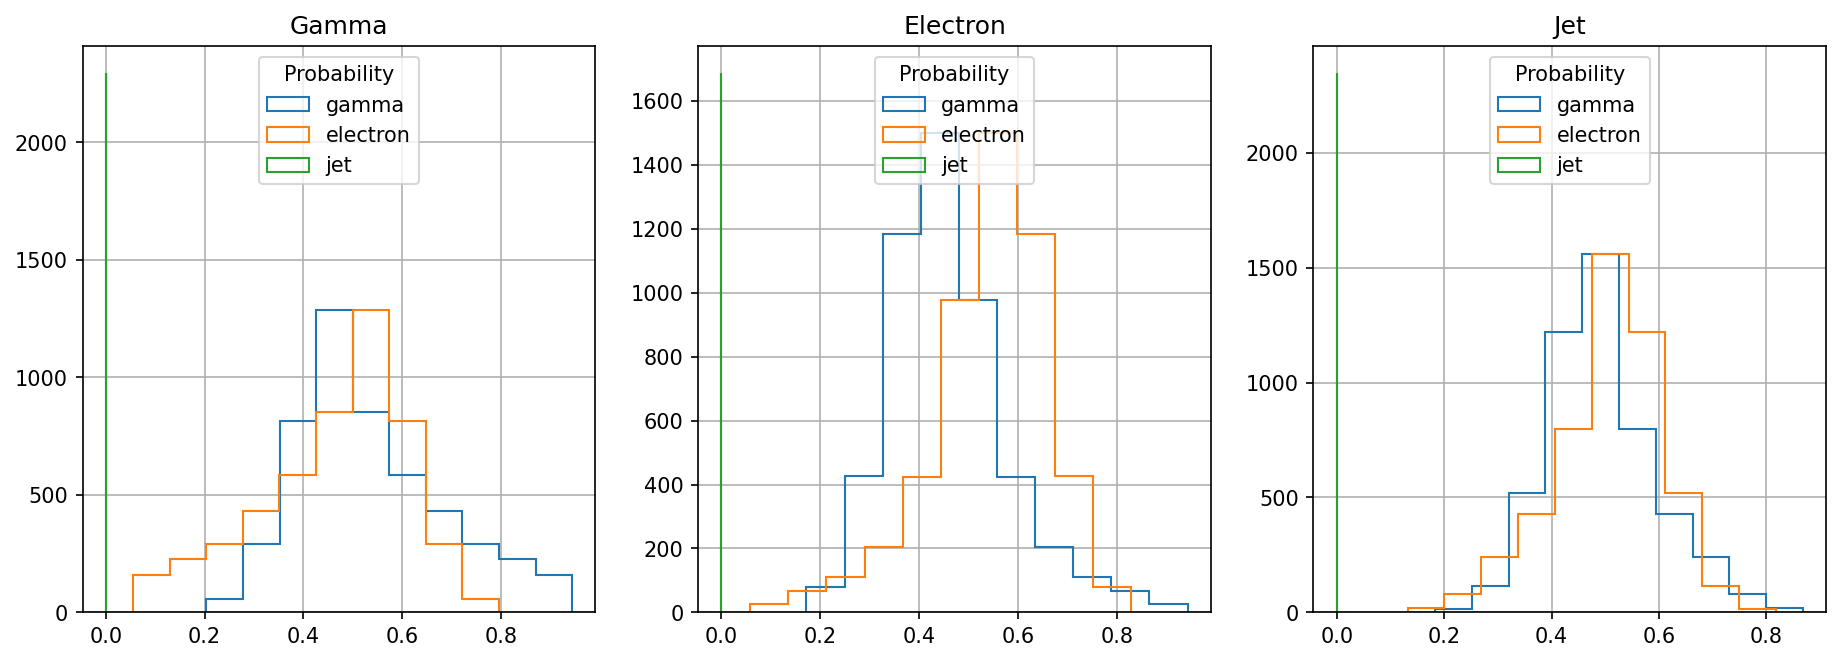

In [129]:
fig, axis = plt.subplots(1, 3, figsize=(15,5))
plot_probability(df_gamma, name='Gamma', ax=axis[0])
plot_probability(df_ele, name='Electron', ax=axis[1])
plot_probability(df_jet, name='Jet', ax=axis[2])

In [132]:
def plot_roc(df_true, df_false, name='gamma', ax=None):
    ytrue = np.concatenate([np.ones(shape=5000), np.zeros(shape=5000)])
    yscore = np.concatenate([df_true['w_'+name], df_false['w_'+name]])
    fpr, tpr, _ = roc_curve(ytrue, yscore)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, color='darkorange')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.grid()
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate') 
    ax.legend(loc="lower right")
    ax.set_title(name)

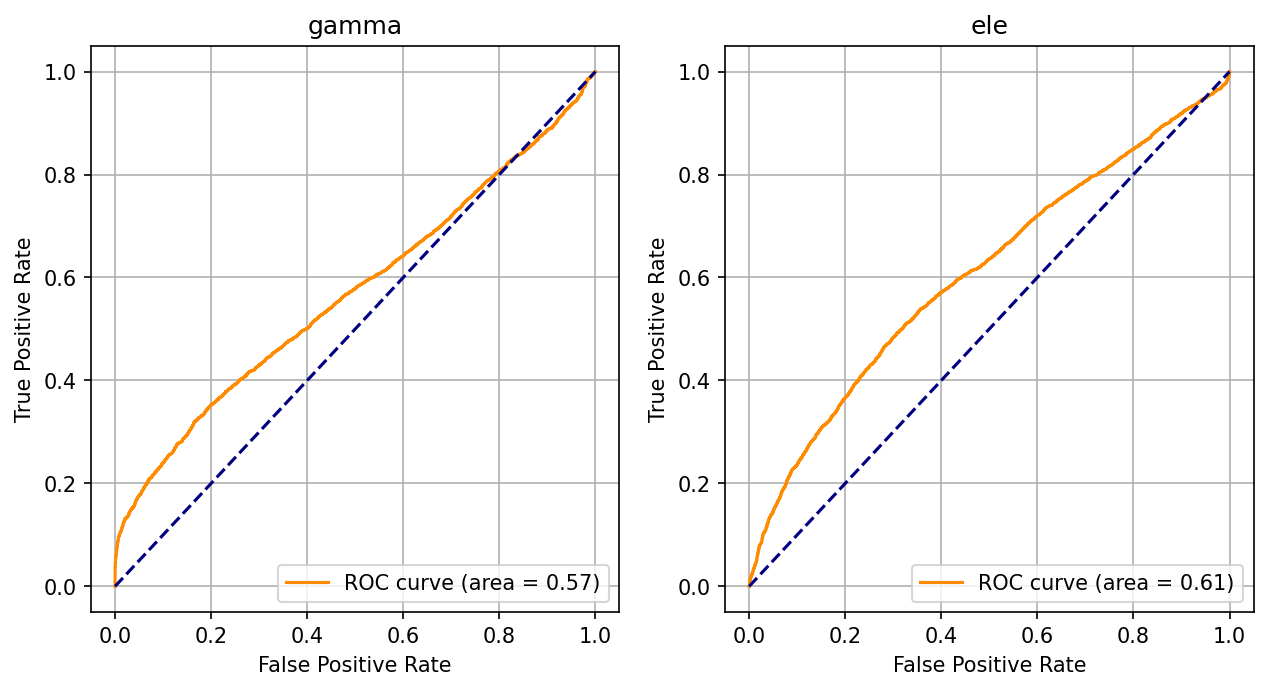

In [133]:
fig, axis = plt.subplots(1, 2, figsize=(10,5))

plot_roc(df_gamma, df_jet, name='gamma', ax=axis[0])
plot_roc(df_ele, df_jet, name='ele', ax=axis[1])

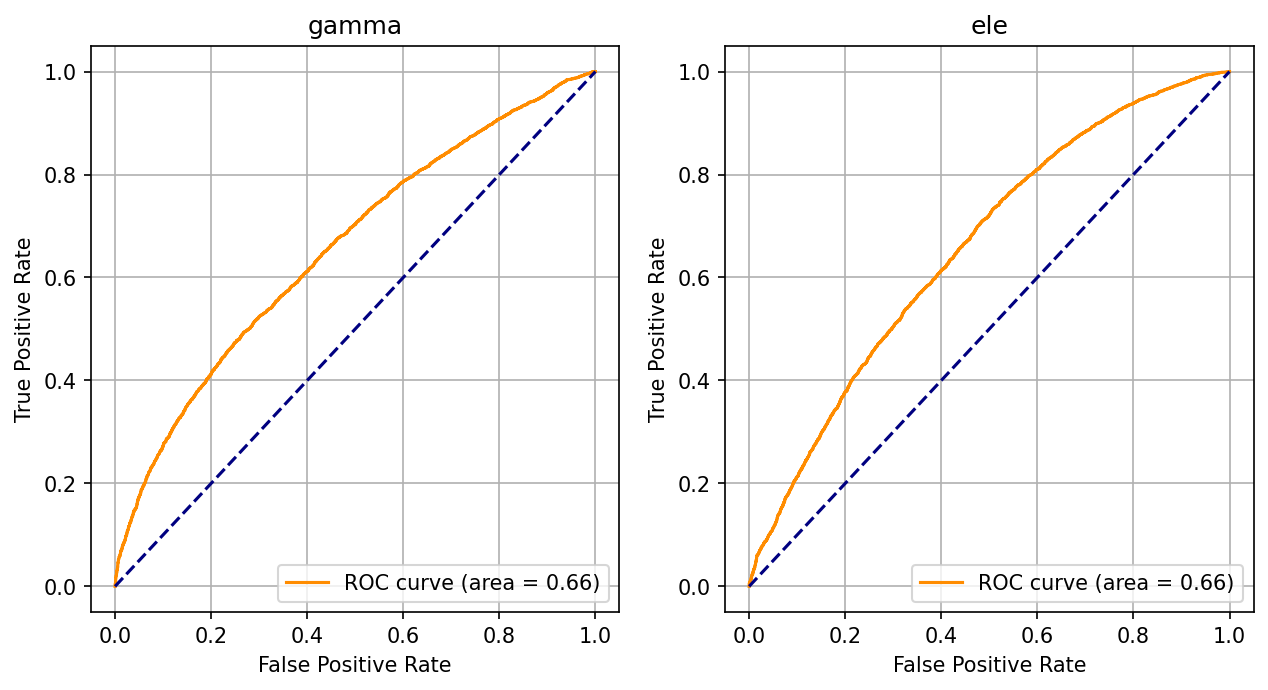

In [134]:
fig, axis = plt.subplots(1, 2, figsize=(10,5))

plot_roc(df_gamma, df_ele, name='gamma', ax=axis[0])
plot_roc(df_ele, df_gamma, name='ele', ax=axis[1])